In [1]:
import numpy as np
import matplotlib.pyplot as plt


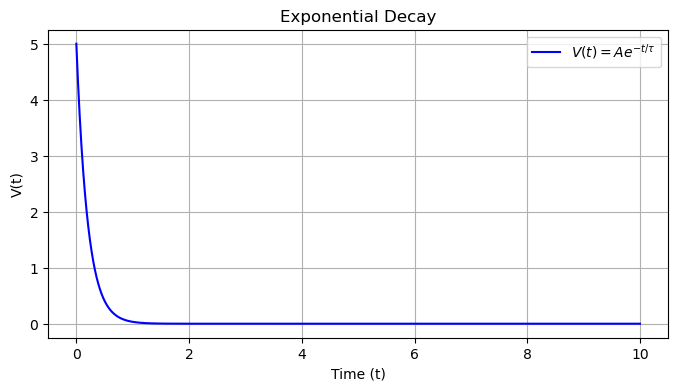

In [2]:
## PLOTTING THE EQUATION
A = 5
tau = 0.2
t = np.linspace(0, 10, 1000)

## Exponential decay function
V = A * np.exp(-t / tau)

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(t, V, label=r'$V(t) = A e^{-t/\tau}$', color='blue')
plt.title('Exponential Decay')
plt.xlabel('Time (t)')
plt.ylabel('V(t)')
plt.grid(True)
plt.legend()
plt.show()

If the neuron receives an incoming spike with synaptic weight  $w$,  
the membrane potential increases like this:  
$$V \leftarrow V + w$$


### Simulating a spike

To simulate a spike, we use this psudo workflow

```text 
for each time in t:
    Update V at time t, to V at time t+dt
    process any incoming spikes
    check if V crossed the threshold
    if so:
        fire a spike
        reset V 
```

The value updating equation as follows,
$$V(t + dt) = V(t)e^{-dt/\tau}$$

Let's take $\alpha = e^{-dt/\tau}$, which doesn't depends on the time $t$ or membrane potential $V$. Then, 
$$V(t + dt) = \alpha V(t)$$


In [3]:
try:
    import ipywidgets as widgets
except:
    widgets = None

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display


In [4]:
fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)
plt.close(fig)

'''
Function that runs the simulation of the leaky integrate-and-fire neuron model.
The neuron integrates the input current and fires a spike when the membrane potential exceeds a threshold.
tau: time constant for the membrane potential decay
t0, t1, t2: time of three input spikes
w: input synapse weight
threshold: threshold for firing a spike
reset: reset value for the membrane potential after firing a spike
'''

def LIF(tau=10, t0=20, t1=40, t2=60, w=0.1, threshold=1.0, reset=0.0):
    # Spike times, keep sorted because it's more efficient to pop the last value off the list
    times = [t0, t1, t2]
    times.sort(reverse=True)

    # Default parameters
    duration = 100  # total duration of the simulation
    dt = 0.1  # time step
    alpha = np.exp(-dt / tau)  # decay factor for the membrane potential
    V_rec = []  # record of membrane potential
    V = 0.0  # initial membrane potential
    T = np.arange(np.round(duration / dt)) * dt  # time vector
    spikes = [] # record of spike times

    # Run the simulation
    for t in T:
        V_rec.append(V)  # record the membrane potential
        V *= alpha  # update the membrane potential
        if times and t >= times[-1]:
            V += w
            times.pop()  # remove the last spike time
        V_rec.append(V) # Record the V befor reset so we can see the spike
        if V >= threshold:
            V = reset  # reset the membrane potential
            spikes.append(t)  # record the spike time

    # Plot the results
    ax.clear()
    for t in times:
        ax.axvline(t, ls=':', c='b')
    ax.plot(np.repeat(T, 2), V_rec, '-k', lw=2)
    for t in spikes:
        ax.axvline(t, ls='--', c='r')
    ax.axhline(threshold, ls='--', c='g', label='Threshold')
    ax.set_xlim(0, duration)
    ax.set_ylim(-1, 2)
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Membrane Potential (V)')
    plt.tight_layout()
    display(fig)

In [5]:
## Interactive widget
widgets.interact(LIF,
                 tau=widgets.IntSlider(min=1, max=100, value=50),
                 t0=widgets.IntSlider(min=0, max=100, value=20),
                 t1=widgets.IntSlider(min=0, max=100, value=40),
                 t2=widgets.IntSlider(min=0, max=100, value=60),
                 w=widgets.FloatSlider(min=-1, max=2, step=0.05, value=0.5),
                 threshold=widgets.FloatSlider(min=0.0, max=2.0, step=0.05, value=1.0),
                 reset=widgets.FloatSlider(min=-1.0, max=1.0, step=0.05, value=0.0))

interactive(children=(IntSlider(value=50, description='tau', min=1), IntSlider(value=20, description='t0'), In…

<function __main__.LIF(tau=10, t0=20, t1=40, t2=60, w=0.1, threshold=1.0, reset=0.0)>

In 2D Leaky-Integrate-Fire neurones, thhere is no fixed threshold. Instead, the threshold value increases dynamically, by making the model slightly complicated.
The differential equation for $V_t$ then,
$$\tau_t \frac{dV_t}{dt} = -(V_t - V_t^0)$$

After tehe spike happens,
$$V_t \leftarrow V_t + \delta V_t$$

So, now the value updating equation becoms, 
$$V(t + dt) = V(t)^0 + \alpha (V(t) - V(t)^0)$$

where $\alpha$ as same as previous.


In [8]:
fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)
plt.close(fig)

def LIF_2D (tau=10, taut=20, w=0.1, t0=20, t1=40, t2=60, threshold=1.0, dtthreshold=0.5, reset=0.0 ):
    # Spike times, keep sorted because it's more efficient to pop the last value off the list
    times = [t0, t1, t2]
    times.sort(reverse=True)

    # Default parameters
    duration = 100  # total duration of the simulation
    dt = 0.1  # time step
    alpha = np.exp(-dt / tau)  # decay factor for the membrane potential
    beta = np.exp(-dt / taut)  # decay factor for Vt
    V_rec = []  # record of membrane potential
    Vt_rec = []  # record of threshold potential
    V = 0.0  # initial membrane potential
    Vt = threshold  # initial threshold potential
    T = np.arange(np.round(duration / dt)) * dt  # time vector
    spikes = [] # record of spike times

    ax.clear()
    for t in times:
        ax.axvline(t, ls=':', c='b')
    # Run the simulation
    for t in T:
        V_rec.append(V)  # record the membrane potential
        Vt_rec.append(Vt)  # record the threshold potential
        V *= alpha  # update the membrane potential
        Vt = (Vt - threshold) * beta + threshold # update the membrane potential
        if times and t >= times[-1]:
            V += w
            times.pop()  # remove the last spike time
        V_rec.append(V) # Record the V befor reset so we can see the spike
        Vt_rec.append(Vt)  # Record the Vt before reset
        if V >Vt:
            V = reset  # reset the membrane potential
            Vt += dtthreshold  # update the threshold potential
            spikes.append(t)  # record the spike time

    # Plot the results
    ax.plot(np.repeat(T, 2), V_rec, '-k', lw=2)
    ax.plot(np.repeat(T, 2), Vt_rec, '--g', lw=2)
    for t in spikes:
        ax.axvline(t, ls='--', c='r')
    # ax.axhline(threshold, ls='--', c='g', label='Threshold')
    ax.set_xlim(0, duration)
    ax.set_ylim(-1, 2)
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Membrane Potential (V)')
    plt.tight_layout()
    display(fig)

In [9]:
widgets.interact(LIF_2D,
    tau=widgets.IntSlider(min=5, max=100, value=50, step=5),
    taut=widgets.IntSlider(min=5, max=100, value=100, step=5),
    t0=widgets.IntSlider(min=0, max=100, value=20),
    t1=widgets.IntSlider(min=0, max=100, value=40),
    t2=widgets.IntSlider(min=0, max=100, value=60),
    w=widgets.FloatSlider(min=-1, max=2, step=0.05, value=0.5),
    threshold=widgets.FloatSlider(min=0.0, max=2.0, step=0.05, value=1.0),
    dthreshold=widgets.FloatSlider(min=0.0, max=1.0, step=0.05, value=0.5),
    reset=widgets.FloatSlider(min=-1.0, max=1.0, step=0.05, value=0.0))

interactive(children=(IntSlider(value=50, description='tau', min=5, step=5), IntSlider(value=100, description=…

<function __main__.LIF_2D(tau=10, taut=20, w=0.1, t0=20, t1=40, t2=60, threshold=1.0, dtthreshold=0.5, reset=0.0)>